In [27]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation =tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2608 - acc: 0.9236
Epoch 2/3
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1080 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0744 - acc: 0.9766


In [28]:
val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss, val_accuracy)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0926 - acc: 0.9727
0.09261394363669678 0.9727


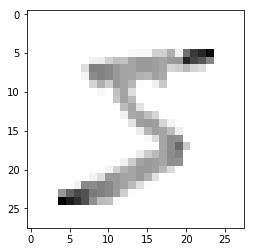

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [29]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [30]:
model.save('epic_num_reader.model')

In [31]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [36]:
predictions=new_model.predict(x_test)

In [37]:
print(predictions)

[[1.54835035e-07 5.15183899e-07 1.01054575e-05 ... 9.99953985e-01
  2.61586678e-07 3.69905308e-07]
 [8.28064367e-05 2.71713501e-03 9.97035742e-01 ... 2.03441027e-06
  6.75811862e-06 9.56994306e-09]
 [9.31197803e-07 9.99956131e-01 6.42953137e-06 ... 6.32808224e-06
  1.72355012e-05 1.11606830e-07]
 ...
 [1.39027222e-07 2.69935470e-07 2.79009118e-08 ... 2.17365596e-05
  1.90287653e-06 1.18721800e-04]
 [3.40506404e-06 6.28003681e-06 3.49062816e-07 ... 2.04655844e-05
  8.93958937e-03 7.58867316e-07]
 [1.41683122e-05 6.25825976e-07 1.80490986e-06 ... 3.18486149e-09
  9.41587132e-06 2.24261100e-07]]


In [43]:
import numpy as np

print(np.argmax(predictions[8]))

5


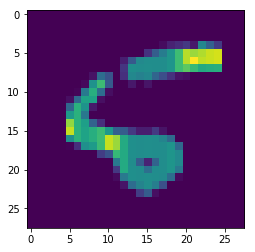

In [44]:
plt.imshow(x_test[8])
plt.show()